## Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


## Load Data

In [2]:
data = pd.read_csv('Iris.csv') 

## Preview Data

In [3]:
data.describe() #statistical details of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.head() #First 5 columns of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data['Species'].unique() #unique value of speicies in data

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# visualization of data

In [6]:
sns.set() #set seaborn

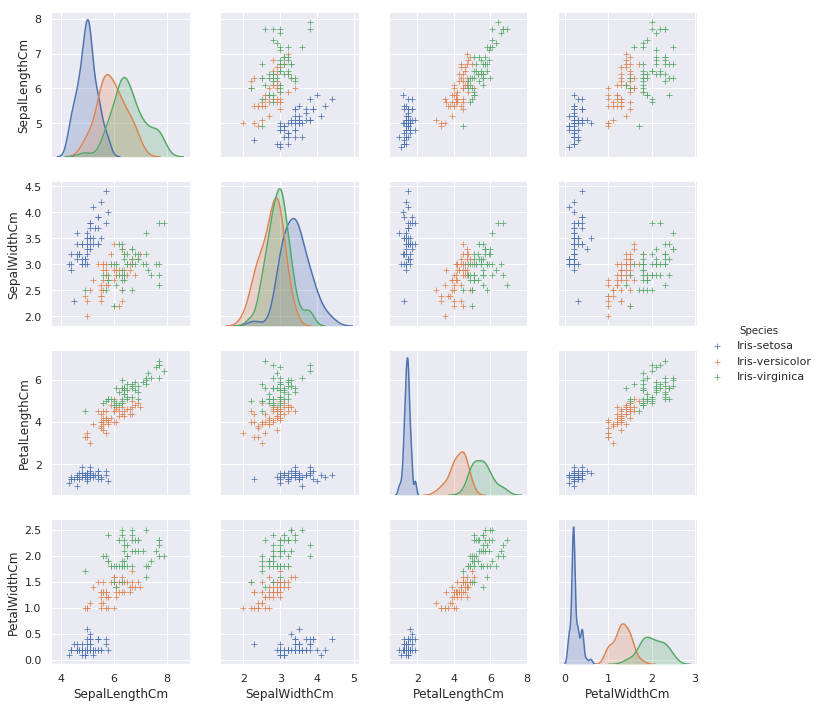

In [7]:
#drop id from data and save in tmp variable

tmp = data.drop('Id',axis = 1)

#plot each data in tmp by species 

g = sns.pairplot(tmp,hue = 'Species',markers = '+')
plt.show()

# Create model

In [9]:
#predictor 

X = data.drop(['Id','Species'],axis= 1)

#target 
y = data['Species']

#print shape of predictor and target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
#split data and print its shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [13]:
#Try running from k = 1 through 25 and record testing accuracy

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    


In [14]:
#use logisticregression to fit and predict data

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

#use accuracy_score metrics to check accuracy of model

print(metrics.accuracy_score(y_test,y_pred))

0.9333333333333333


/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
